In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load csv file d
df = pd.read_csv("./data/metadata_contrastive.csv", index_col=0)

# Concentration is last string after _ in the treatment column
df["concentration"] = df["treatment"].str.split("_").str[-1]
df["concentration"] = df["concentration"].str.replace("uM", "").str.replace("nM", "").astype(float)

cols_salient = [x for x in df.columns if "salient" in x]

df.head(10)

,target,pathway,compound,treatment,salient_0,salient_1,salient_2,salient_3,salient_4,salient_5,...,background_1,background_2,background_3,background_4,background_5,background_6,background_7,background_8,background_9,concentration
TGTAAGCCAGGCTTGC-02,Raf,MAPK,LXH254,LXH254_10uM,0.046067,0.040717,-0.004764,0.004757,-2.322478,0.053182,...,-0.000193,-0.000631,-0.599394,-0.116534,-0.428922,-2.290606,-0.602243,-0.459246,0.324635,10.0
TTTGATCAGCCATTTG-18,PKC,TGF-beta/Smad,Sotrastaurin,Sotrastaurin_10uM,0.017796,0.031867,-0.005153,0.004777,0.657301,0.041216,...,0.000067,0.000592,1.843215,0.526929,0.878921,-0.702561,-0.427511,0.314271,-2.253290,10.0
TCGCTTGAGTACCCTA-02,Control,Control,Vehicle,Vehicle_1uM,0.018016,0.030559,-0.004930,0.004380,-0.290360,0.044212,...,-0.000136,0.000240,-1.672175,1.165608,0.166646,0.402406,-2.341921,-0.413965,1.018217,1.0
CACGTGGCAATACCTG-20,PI3K,PI3K/Akt/mTOR,Pictilisib (GDC-0941),Pictilisib (GDC-0941)_1uM,0.009877,0.043319,-0.012129,0.005954,0.234663,0.039607,...,-0.000187,0.000698,-0.683552,-0.708564,-2.195979,1.815221,0.342487,0.839350,-0.252468,1.0
AGGCTGCCAAGGCCTC-01,Control,Control,Vehicle,Vehicle_100nM,0.029251,0.027294,-0.004486,0.003855,0.258213,0.048747,...,-0.000382,0.000685,0.189371,1.105406,1.919044,0.681020,-1.139994,0.726855,-0.049872,100.0
TCGCTCATCCAACTGA-27,MEK,MAPK,Pimasertib (AS-703026),Pimasertib (AS-703026)_1uM,0.017416,0.035601,-0.004369,0.005260,0.590643,0.046952,...,-0.000099,0.000153,0.611024,0.064149,0.577078,0.171900,1.165321,-0.141625,0.556405,1.0
AGCCACGTCTTGAGCA-08,MEK,MAPK,GDC-0623,GDC-0623_10uM,0.001131,0.028250,-0.005492,0.002903,0.040449,0.034110,...,0.000066,-0.000354,-1.332007,-0.091666,-0.861020,0.384035,0.047693,-0.794268,-0.502431,10.0
ACTATCTGTATACAGA-01,PI3K,PI3K/Akt/mTOR,AZD8186,AZD8186_10uM,0.009349,0.020757,-0.000986,0.004823,0.047715,0.037429,...,-0.000142,0.001074,-1.844861,1.106061,0.161119,0.573863,0.975832,0.574280,2.224085,10.0
GTCTTTAAGCAAGTCG-20,PKC,TGF-beta/Smad,Sotrastaurin,Sotrastaurin_1uM,0.004164,0.030516,-0.008205,0.003394,1.547191,0.039104,...,0.000377,-0.000331,-0.211236,-0.888146,0.686538,0.635245,0.115288,-0.402450,-0.144199,1.0
GTTAGTGTCGATAACC-06,Control,Control,Vehicle,Vehicle_10uM,0.031980,0.037763,-0.004500,0.005377,-1.439182,0.043213,...,0.000181,-0.000912,-0.018335,-1.525857,0.977518,0.346843,-0.094491,-0.542230,-0.684807,10.0


In [3]:
df.groupby(["compound", "target", "treatment", "pathway", "concentration"]).size().reset_index().loc[
    lambda x: x["target"] == "Control"
]

,compound,target,treatment,pathway,concentration,0
65,No stim,Control,No stim_100nM,Control,100.0,1094
66,No stim,Control,No stim_10uM,Control,10.0,1204
67,No stim,Control,No stim_1uM,Control,1.0,1118
112,Vehicle,Control,Vehicle_100nM,Control,100.0,2329
113,Vehicle,Control,Vehicle_10uM,Control,10.0,2783
114,Vehicle,Control,Vehicle_1uM,Control,1.0,2560


In [4]:
df.groupby(["compound", "treatment"]).size().reset_index()

,compound,treatment,0
0,ASP4132,ASP4132_100nM,268
1,ASP4132,ASP4132_10uM,230
2,ASP4132,ASP4132_1uM,269
3,AZD1480,AZD1480_1uM,330
4,AZD3264,AZD3264_10uM,287
...,...,...,...
118,WYE-125132 (WYE-132),WYE-125132 (WYE-132)_1uM,207
119,XL019,XL019_10uM,382
120,XMD8-92,XMD8-92_10uM,416
121,ZSTK474,ZSTK474_10uM,347


In [5]:
# Prrint number of unique value for each column
for col in ["target", "pathway", "compound", "treatment", "concentration"]:
    print(f"{col}: {df[col].nunique()}")

target: 33
pathway: 16
compound: 90
treatment: 123
concentration: 3


# Make umap plot
umap = UMAP(n_components=2, metric="cosine")  # , n_neighbors=5, min_dist=0.2,
X = df.loc[:, cols_salient].values
X_embedding = umap.fit_transform(X)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.scatterplot(x=X_embedding[:, 0], y=X_embedding[:, 1], hue=df["compound"], legend=False, s=5, ax=ax[0])
sns.scatterplot(x=X_embedding[:, 0], y=X_embedding[:, 1], hue=df["treatment"], legend=False, s=5, ax=ax[1])
sns.scatterplot(x=X_embedding[:, 0], y=X_embedding[:, 1], hue=df["concentration"], legend=False, s=5, ax=ax[2])

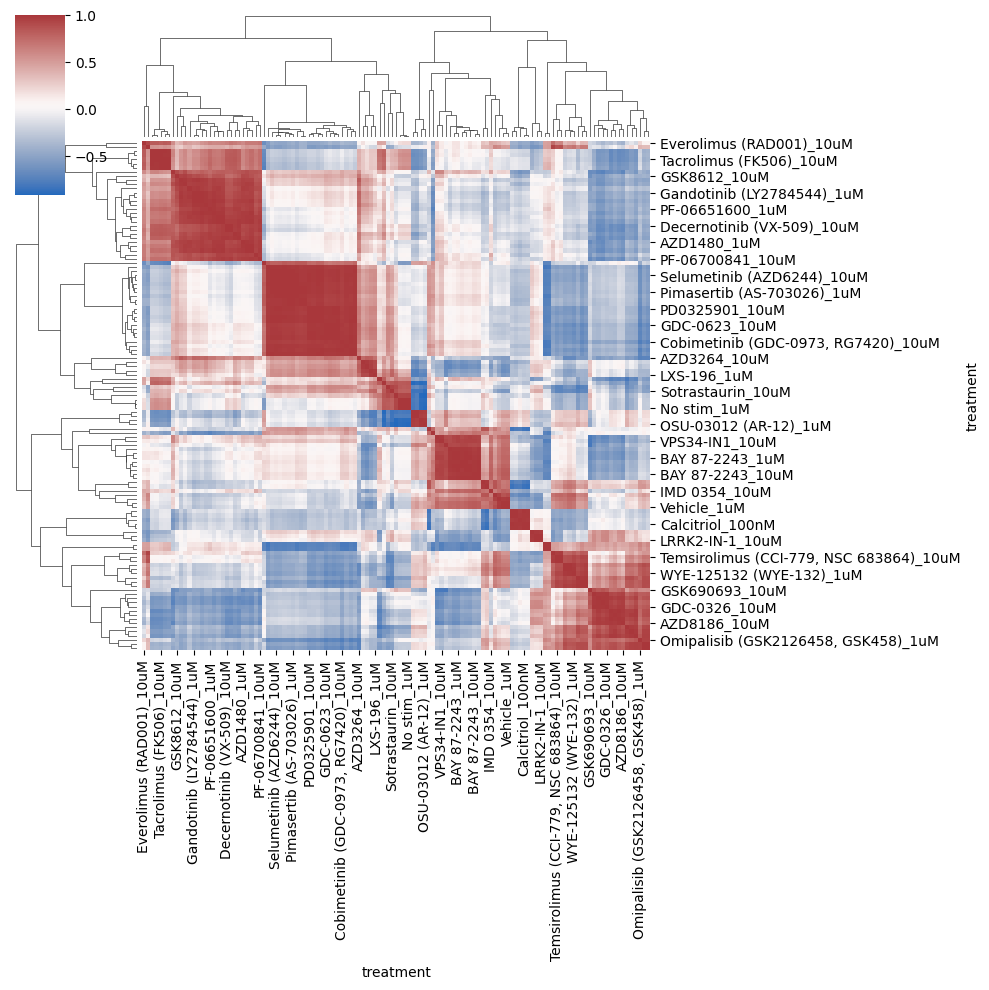

In [6]:
# Compute cosine simmilarity between all treatment averages
from sklearn.metrics.pairwise import cosine_similarity

X_data = df.groupby(["treatment"])[cols_salient].mean()
similarities = pd.DataFrame(cosine_similarity(X_data), index=X_data.index, columns=X_data.index)

# Heatmap and show marginals
# fig, ax = plt.subplots(1, 1, figsize=(30, 30))
# sns.heatmap(similarities, cmap="vlag")
clustergrid = sns.clustermap(similarities, cmap="vlag", figsize=(10, 10))

# Preset X1

In [7]:
df

,target,pathway,compound,treatment,salient_0,salient_1,salient_2,salient_3,salient_4,salient_5,...,background_1,background_2,background_3,background_4,background_5,background_6,background_7,background_8,background_9,concentration
TGTAAGCCAGGCTTGC-02,Raf,MAPK,LXH254,LXH254_10uM,0.046067,0.040717,-0.004764,0.004757,-2.322478,0.053182,...,-0.000193,-0.000631,-0.599394,-0.116534,-0.428922,-2.290606,-0.602243,-0.459246,0.324635,10.0
TTTGATCAGCCATTTG-18,PKC,TGF-beta/Smad,Sotrastaurin,Sotrastaurin_10uM,0.017796,0.031867,-0.005153,0.004777,0.657301,0.041216,...,0.000067,0.000592,1.843215,0.526929,0.878921,-0.702561,-0.427511,0.314271,-2.253290,10.0
TCGCTTGAGTACCCTA-02,Control,Control,Vehicle,Vehicle_1uM,0.018016,0.030559,-0.004930,0.004380,-0.290360,0.044212,...,-0.000136,0.000240,-1.672175,1.165608,0.166646,0.402406,-2.341921,-0.413965,1.018217,1.0
CACGTGGCAATACCTG-20,PI3K,PI3K/Akt/mTOR,Pictilisib (GDC-0941),Pictilisib (GDC-0941)_1uM,0.009877,0.043319,-0.012129,0.005954,0.234663,0.039607,...,-0.000187,0.000698,-0.683552,-0.708564,-2.195979,1.815221,0.342487,0.839350,-0.252468,1.0
AGGCTGCCAAGGCCTC-01,Control,Control,Vehicle,Vehicle_100nM,0.029251,0.027294,-0.004486,0.003855,0.258213,0.048747,...,-0.000382,0.000685,0.189371,1.105406,1.919044,0.681020,-1.139994,0.726855,-0.049872,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACGCTGAGAGCATTA-09,Vitamin,Metabolism,Calcitriol,Calcitriol_10uM,-0.004063,0.025889,-0.003243,0.005139,2.482132,0.034309,...,-0.000030,-0.001024,1.296207,0.401240,0.662966,-0.256225,-1.859955,0.557218,-0.540660,10.0
AAGCATCAGCGGCTCT-18,Control,Control,Vehicle,Vehicle_10uM,0.026074,0.039743,-0.003325,0.006585,-0.840869,0.041822,...,0.000350,0.000379,0.643975,0.892575,-1.687624,-0.921389,-0.586034,-0.115986,-0.105284,10.0
CTGCCATTCGGTGTTA-10,Control,Control,No stim,No stim_100nM,0.002822,0.016862,-0.001879,0.004254,1.287952,0.039966,...,-0.000122,0.000168,-1.521381,0.035297,-0.159922,-0.885024,2.113123,-0.121651,-0.092799,100.0
TCGGTCTCACAAGCTT-09,Raf,MAPK,RO5126766 (CH5126766),RO5126766 (CH5126766)_10uM,0.014345,0.025066,-0.002421,0.004894,-1.518991,0.038519,...,-0.000071,-0.000064,-1.066953,0.375351,-0.971068,0.148941,1.143155,-0.963673,0.753219,10.0


In [8]:
df.shape

(51034, 30)

In [9]:
[x for x in df.treatment.unique() if "Vehi" in x]

['Vehicle_1uM', 'Vehicle_100nM', 'Vehicle_10uM']

In [10]:
[x for x in df.treatment.unique() if "stim" in x]

['No stim_1uM', 'No stim_100nM', 'No stim_10uM']

In [11]:
# Remove vehicle and non-stim from data
df = df.loc[~df["treatment"].isin(["No stim_1uM", "No stim_100nM", "No stim_10uM"])]
print(df.shape)
df = df.loc[~df["treatment"].isin(['Vehicle_1uM', 'Vehicle_100nM', 'Vehicle_10uM'])]
print(df.shape)

(47618, 30)
(39946, 30)


In [12]:
# Sort treatments by their l2 norm
treatment_norms = np.linalg.norm(df.groupby(["treatment"])[cols_salient].mean(), axis=1)
# Create mapping from treatment to norm
treatment_norm_map = dict(zip(df.groupby(["treatment"]).groups.keys(), treatment_norms))

df_treatment_strengths = pd.DataFrame(treatment_norm_map.items(), columns=["treatment", "strength"]).sort_values(
    "strength", ascending=False
)
df_treatment_strengths = df_treatment_strengths.reset_index(drop=True)

<Axes: xlabel='strength', ylabel='Count'>

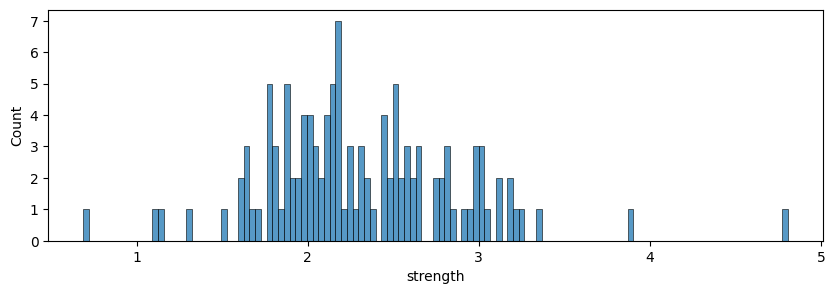

In [13]:
# Plot histogram of strengths
plt.figure(figsize=(10, 3))
sns.histplot(df_treatment_strengths["strength"], bins=123)

In [14]:
def select_subset(n, reordered_data, leave_out, df_treatment_strengths, uniform=True):
    treatment_list = set(reordered_data.columns[:n]) | set(reordered_data.index[:n])
    print(f"Number of final treatments: {len(treatment_list)}")

    # Sample leave_out random treatments uniformly at random from the 5 classes
    if uniform:
        raise NotImplementedError("Not implemented")
    else:
        # Select leave_out random treatments
        leave_out_set = list(np.random.choice(list(treatment_list), size=leave_out, replace=False))

    # Split leave_out_set in two lists by 50% according to class value
    leave_out_beg = leave_out_set[: len(leave_out_set) // 3]
    leave_out_mid = leave_out_set[len(leave_out_set) // 3 : (2 * len(leave_out_set) // 3)]
    leave_out_end = leave_out_set[(2 * len(leave_out_set) // 3) :]
    
    df_treatment_strengths["train"] = False
    df_treatment_strengths.loc[lambda x: x["treatment"].isin(treatment_list), "train"] = True

    df_treatment_strengths["leave_out"] = "none"
    df_treatment_strengths.loc[lambda x: x["treatment"].isin(leave_out_beg), "leave_out"] = "beg"
    df_treatment_strengths.loc[lambda x: x["treatment"].isin(leave_out_end), "leave_out"] = "end"
    df_treatment_strengths.loc[lambda x: x["treatment"].isin(leave_out_mid), "leave_out"] = "mid"

    # Print their ranks in treatment_norm_map
    display(df_treatment_strengths)

    return df_treatment_strengths

reordered_data = similarities.iloc[clustergrid.dendrogram_row.reordered_ind, clustergrid.dendrogram_col.reordered_ind]

df_experiment = select_subset(
    n=50, reordered_data=reordered_data, leave_out=20, df_treatment_strengths=df_treatment_strengths, uniform=False
)

# Save the experiment
df_experiment.to_csv("./data/experiment_50_20_random.csv")

In [15]:
len(df.treatment.unique())

117

In [16]:
reordered_data = similarities.iloc[clustergrid.dendrogram_row.reordered_ind, clustergrid.dendrogram_col.reordered_ind]

df_experiment = select_subset(
    n=90, reordered_data=reordered_data, leave_out=45, df_treatment_strengths=df_treatment_strengths, uniform=False
)

# Save the experiment
df_experiment.to_csv("./data/experiment_4t_90_45_random.csv")

Number of final treatments: 90


,treatment,strength,train,leave_out
0,Avadomide(CC-122)_10uM,4.807382,False,none
1,Avadomide(CC-122)_1uM,3.902222,False,none
2,PF-04965842_10uM,3.366579,True,none
3,ERK5-IN-1_10uM,3.259120,False,none
4,Calcitriol_1uM,3.201902,False,none
...,...,...,...,...
112,LXS-196_1uM,1.524081,True,none
113,GSK8612_10uM,1.317725,True,end
114,DEL-22379_10uM,1.139915,True,end
115,Anisomycin_100nM,1.101951,True,none


In [16]:
reordered_data = similarities.iloc[clustergrid.dendrogram_row.reordered_ind, clustergrid.dendrogram_col.reordered_ind]

df_experiment = select_subset(
    n=60, reordered_data=reordered_data, leave_out=30, df_treatment_strengths=df_treatment_strengths, uniform=False
)

# Save the experiment
df_experiment.to_csv("./data/experiment_4t_60_30_random.csv")

Number of final treatments: 60


,treatment,strength,train,leave_out
0,Avadomide(CC-122)_10uM,4.807382,False,none
1,Avadomide(CC-122)_1uM,3.902222,False,none
2,PF-04965842_10uM,3.366579,True,none
3,ERK5-IN-1_10uM,3.259120,False,none
4,Calcitriol_1uM,3.201902,False,none
...,...,...,...,...
112,LXS-196_1uM,1.524081,True,none
113,GSK8612_10uM,1.317725,True,none
114,DEL-22379_10uM,1.139915,True,none
115,Anisomycin_100nM,1.101951,False,none
